In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [40]:
crypto_date_list = []
crypto_name_list = []
crypto_symbol_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypto_voulume_24hr_list = []
crypto_pct_1hr_list = []
crypto_pct_24hr_list = []
crypto_pct_7day_list = []

In [41]:
df = pd.DataFrame()

In [42]:
def scrape(date):
    url = 'https://coinmarketcap.com/historical/' + date
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})
    count = 0
    for row in tr:
        if count == 10:
            break
        count += 1

        try:
            crypto_date = date
        except AttributeError:
            crypto_date = "null"

        try:
            name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
            crypto_name = name_column.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()
        except AttributeError:
            crypto_name = "null"

        try:
            crypto_symbol = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__symbol'}).text.strip()
        except AttributeError:
            crypto_symbol = "null"

        try:
            crypto_market_cap = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
        except AttributeError:
            crypto_market_cap = "null"

        try:
            crypto_price = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
        except AttributeError:
            crypto_price = "null"

        try:
            crypto_circulating_supply = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip().split(' ')[0]
        except AttributeError:
            crypto_circulating_supply = "null"

        try:
            crypto_voulume_24hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'}).text.strip()
        except AttributeError:
            crypto_voulume_24hr = "null"

        try:
            crypto_pct_1hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h'}).text.strip()
        except AttributeError:
            crypto_pct_1hr = "null"

        try:
            crypto_pct_24hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h'}).text.strip()
        except AttributeError:
            crypto_pct_24hr = "null"

        try:
            crypto_pct_7day = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d'}).text.strip()
        except AttributeError:
            crypto_pct_7day = "null"

        crypto_date_list.append(crypto_date)
        crypto_name_list.append(crypto_name)
        crypto_symbol_list.append(crypto_symbol)
        crypto_market_cap_list.append(crypto_market_cap)
        crypto_price_list.append(crypto_price)
        crypto_circulating_supply_list.append(crypto_circulating_supply)
        crypto_voulume_24hr_list.append(crypto_voulume_24hr)
        crypto_pct_1hr_list.append(crypto_pct_1hr)
        crypto_pct_24hr_list.append(crypto_pct_24hr)
        crypto_pct_7day_list.append(crypto_pct_7day)

In [43]:
def get_sundays(year_start, month_start, year_end, month_end):
    sundays = []

    # Create the start and end dates
    start_date = datetime.date(year_start, month_start, 1)
    end_date = datetime.date(year_end, month_end, 1)

    # Find the first Sunday of the start month
    while start_date.weekday() != 6:
        start_date += datetime.timedelta(days=1)

    # Add all the Sundays between start and end dates to the list
    current_date = start_date
    while current_date <= end_date:
        sundays.append(current_date.strftime("%Y%m%d"))
        current_date += datetime.timedelta(days=7)

    return sundays

In [44]:
import datetime
# Cryptocurrency Historical df Started from 2013-04-28
sundays_between_dates = get_sundays(2013, 5, 2023, 7)
print(sundays_between_dates)

['20130505', '20130512', '20130519', '20130526', '20130602', '20130609', '20130616', '20130623', '20130630', '20130707', '20130714', '20130721', '20130728', '20130804', '20130811', '20130818', '20130825', '20130901', '20130908', '20130915', '20130922', '20130929', '20131006', '20131013', '20131020', '20131027', '20131103', '20131110', '20131117', '20131124', '20131201', '20131208', '20131215', '20131222', '20131229', '20140105', '20140112', '20140119', '20140126', '20140202', '20140209', '20140216', '20140223', '20140302', '20140309', '20140316', '20140323', '20140330', '20140406', '20140413', '20140420', '20140427', '20140504', '20140511', '20140518', '20140525', '20140601', '20140608', '20140615', '20140622', '20140629', '20140706', '20140713', '20140720', '20140727', '20140803', '20140810', '20140817', '20140824', '20140831', '20140907', '20140914', '20140921', '20140928', '20141005', '20141012', '20141019', '20141026', '20141102', '20141109', '20141116', '20141123', '20141130', '20

In [45]:
print('There are ' + str(len(sundays_between_dates)) + ' Sundays between 2013-05-05 and 2023-07-09')
for i in range(len(sundays_between_dates)):
    scrape(sundays_between_dates[i])
    print("completed: " + str(i) + " out of " + str(len(sundays_between_dates)))

There are 530 Sundays between 2013-05-05 and 2023-07-09


completed: 0 out of 530
completed: 1 out of 530
completed: 2 out of 530
completed: 3 out of 530
completed: 4 out of 530
completed: 5 out of 530
completed: 6 out of 530
completed: 7 out of 530
completed: 8 out of 530
completed: 9 out of 530
completed: 10 out of 530
completed: 11 out of 530
completed: 12 out of 530
completed: 13 out of 530
completed: 14 out of 530
completed: 15 out of 530
completed: 16 out of 530
completed: 17 out of 530
completed: 18 out of 530
completed: 19 out of 530
completed: 20 out of 530
completed: 21 out of 530
completed: 22 out of 530
completed: 23 out of 530
completed: 24 out of 530
completed: 25 out of 530
completed: 26 out of 530
completed: 27 out of 530
completed: 28 out of 530
completed: 29 out of 530
completed: 30 out of 530
completed: 31 out of 530
completed: 32 out of 530
completed: 33 out of 530
completed: 34 out of 530
completed: 35 out of 530
completed: 36 out of 530
completed: 37 out of 530
completed: 38 out of 530
completed: 39 out of 530
completed:

In [46]:
df['Date'] = crypto_date_list
df['Name'] = crypto_name_list
df['Symbol'] = crypto_symbol_list
df['Market Cap'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Volume (24hr)'] = crypto_voulume_24hr_list
df['% 1h'] = crypto_pct_1hr_list
df['% 24h'] = crypto_pct_24hr_list
df['% 7d'] = crypto_pct_7day_list

df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,20130505,Bitcoin,BTC,"$1,288,693,216.22",$115.91,"11,118,050",null,0.43%,2.97%,-13.81%
1,20130505,Litecoin,LTC,"$62,298,217.32",$3.5909,"17,348,954",null,0.10%,2.87%,-16.72%
2,20130505,Namecoin,NMC,"$6,290,543.05",$1.1510,"5,465,350",null,-1.19%,8.91%,1.64%
3,20130505,Peercoin,PPC,"$5,718,446.46",$0.3037,"18,830,240",null,0.31%,2.61%,-22.20%
4,20130505,Feathercoin,FTC,"$2,017,436.23",$0.313,"6,444,650",null,-12.81%,-29.71%,--
...,...,...,...,...,...,...,...,...,...,...
2005,20170305,Litecoin,LTC,"$195,313,674.46",$3.9016,"50,060,407","$2,836,911.75",0.45%,0.80%,2.13%
2006,20170305,Ethereum Classic,ETC,"$125,058,654.92",$1.3982,"89,442,118","$1,580,646.50",0.23%,-2.03%,12.40%
2007,20170305,NEM,XEM,"$102,037,861.00",$0.01134,"8,999,999,999","$711,023.88",-0.48%,18.07%,75.68%
2008,20170305,MaidSafeCoin,MAID,"$75,819,909.04",$0.1675,"452,552,412","$260,957.77",0.14%,-0.84%,-3.92%


In [47]:
# Save the DataFrame as a CSV file
df.to_csv('output.csv', index=False)

In [48]:
from datetime import datetime

# Function to clean monetary values and convert to float
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

# Function to clean percentage values and convert to float
def clean_percentage(x):
    if isinstance(x, str):
        return(x.replace('%', ''))
    return(x)

# Apply the cleaning functions to the relevant columns
df['Market Cap'] = df['Market Cap'].apply(clean_currency).astype('float')
df['Price'] = df['Price'].apply(clean_currency).astype('float')
df['Circulating Supply'] = df['Circulating Supply'].apply(clean_currency).astype('float')
df['Volume (24hr)'] = df['Volume (24hr)'].apply(clean_currency).astype('float')
df['% 1h'] = df['% 1h'].apply(clean_percentage).astype('float')
df['% 24h'] = df['% 24h'].apply(clean_percentage).astype('float')
df['% 7d'] = df['% 7d'].apply(clean_percentage).astype('float')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Display the cleaned data
df.head()


ValueError: could not convert string to float: 'null'

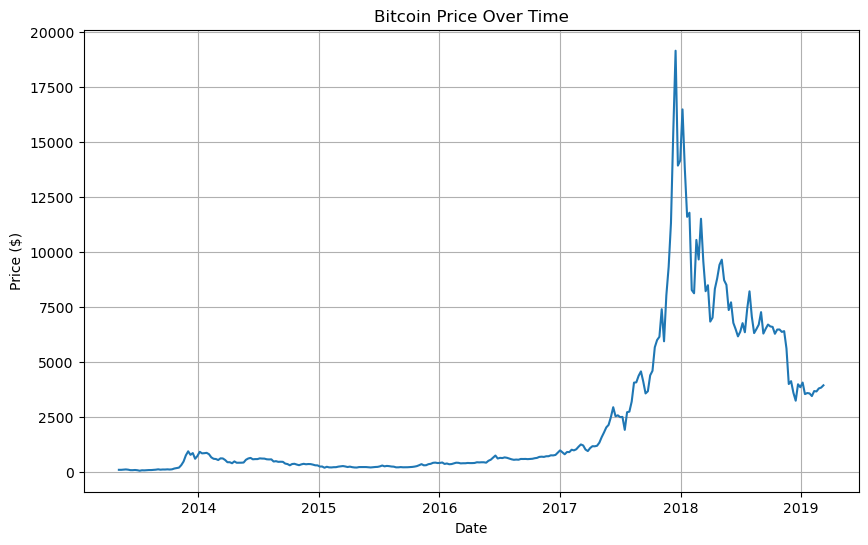

In [ ]:
import matplotlib.pyplot as plt

# Filter data for Bitcoin
btc_data = df[df['Name'] == 'Bitcoin']

# Plot the price of Bitcoin over time
plt.figure(figsize=(10,6))
plt.plot(btc_data['Date'], btc_data['Price'])
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Bitcoin Price Over Time')
plt.grid(True)
plt.show()
